In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("online_shoppers_intentions.csv")

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file = 'shoppers_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

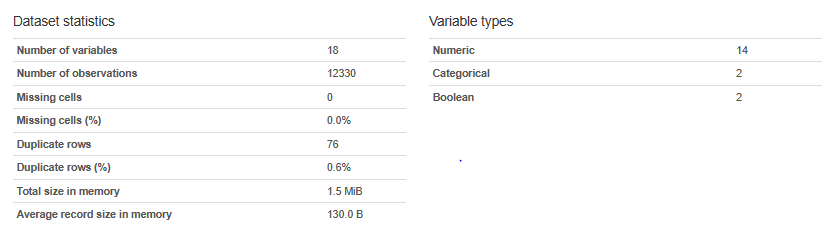

In [5]:
# Duplicate Rows: It contains a list of the most common duplicated rows.
# 1. No missing values found
# 2 .Need to remove duplicate values

In [6]:
data.drop_duplicates(keep='first', inplace=True)

In [7]:
# After removing duplicates the shape of DF
data.shape

(12205, 18)

In [8]:
# As we can see there are 2 char and 2 boolean values which need to be converted into numerical using label encoder
# char -- Month,VisitorType
# boolean -- Weekend,Revenue

In [9]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates in %', 'ExitRates in %', 'PageValues',
       'SpecialDay (probability)', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [10]:
data['Month'] = data['Month'].astype('category')
data['Month'] = data['Month'].cat.codes

In [11]:
data['VisitorType'] = data['VisitorType'].astype('category')
data['VisitorType'] = data['VisitorType'].cat.codes

In [12]:
data['Weekend'] = data['Weekend'].astype('int')

In [13]:
data['Revenue'] = data['Revenue'].astype('int')

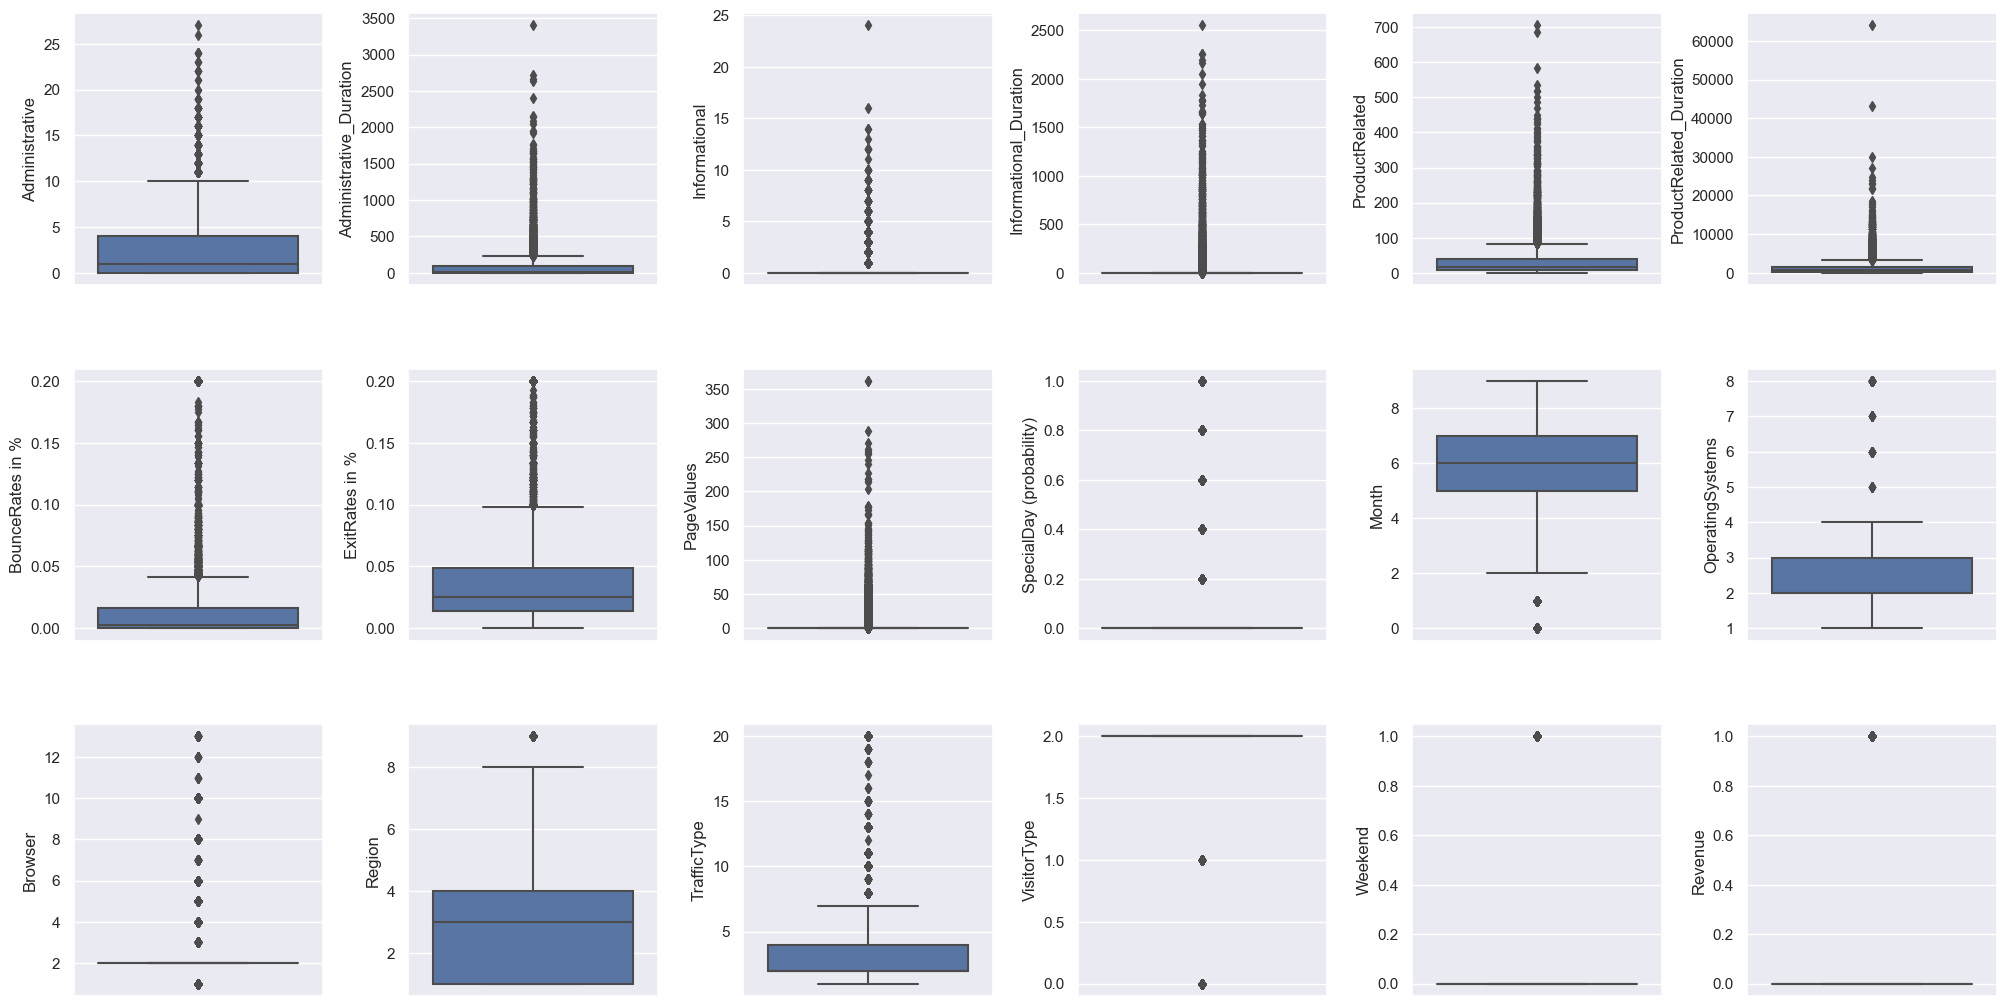

In [14]:
fig,axs = plt.subplots(ncols = 6,nrows =3, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k,data=data,ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4,w_pad=0.5,h_pad = 5.0)

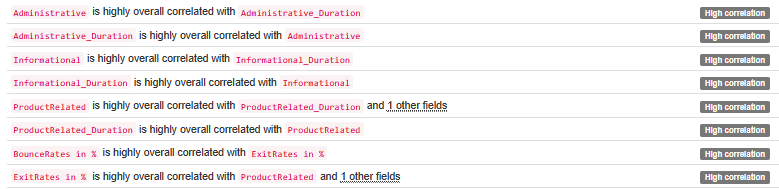

In [15]:
# As the following variables are highly correlated. we are dropping one variable out of two for each variable
data = data.drop(['Administrative','Informational','ProductRelated','BounceRates in %'],axis =1)

In [16]:
data = pd.get_dummies(columns = ['Month','VisitorType'],data =data)

In [17]:
data.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'ExitRates in %', 'PageValues',
       'SpecialDay (probability)', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'Weekend', 'Revenue', 'Month_0', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'VisitorType_0', 'VisitorType_1', 'VisitorType_2'],
      dtype='object')

In [18]:
data = data.drop(['Month_0','VisitorType_0'],axis = 1)

In [19]:
corr = data.corr()

<AxesSubplot:>

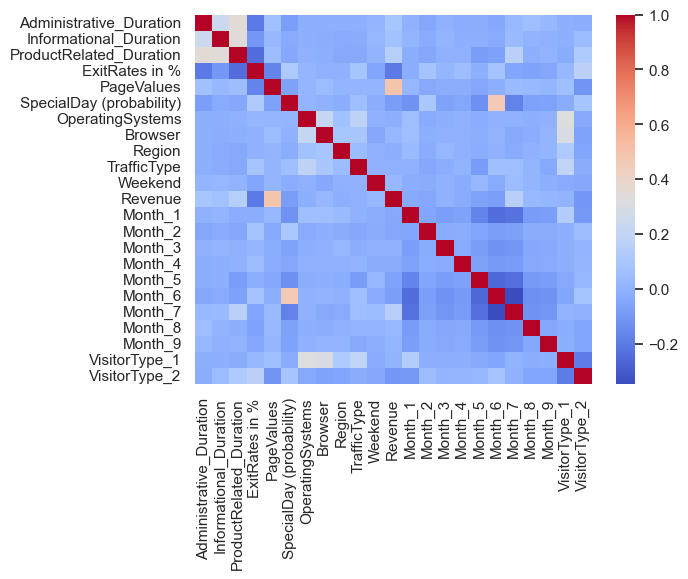

In [20]:
sns.heatmap(corr,cmap = 'coolwarm')

In [21]:
# Splitting data into dependent(y) and independent variables(x)
x = data.drop('Revenue',axis =1)
y = data['Revenue']

In [22]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [23]:
x = pd.DataFrame(x_scaler,columns = x.columns[:])

In [24]:
# Checking for imbalanced data
y.value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

In [25]:
# handling imbalance data
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
x_ros,y_ros = ROS.fit_resample(x,y)

In [26]:
y_ros.value_counts()

0    10297
1    10297
Name: Revenue, dtype: int64

In [27]:
# split data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size = 0.25,random_state = 1)

In [28]:
# Building the model
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=500, criterion='entropy')
rforest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [29]:
y_pred_train = rforest.predict(x_train)
y_pred_test = rforest.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
print("Training accuracy:",accuracy_score(y_train,y_pred_train))
print("Test accuracy:",accuracy_score(y_test,y_pred_test))

Training accuracy: 1.0
Test accuracy: 0.9574674694115363


In [32]:
print('*********** Train ***********')
print(confusion_matrix(y_train,y_pred_train))
print('*********** Test ***********')
print(confusion_matrix(y_test,y_pred_test))

*********** Train ***********
[[7702    0]
 [   0 7743]]
*********** Test ***********
[[2385  210]
 [   9 2545]]


In [33]:
print('************************ Train ***********************')
print(classification_report(y_train,y_pred_train))
print('************************ Test ***********************')
print(classification_report(y_test,y_pred_test))

************************ Train ***********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7702
           1       1.00      1.00      1.00      7743

    accuracy                           1.00     15445
   macro avg       1.00      1.00      1.00     15445
weighted avg       1.00      1.00      1.00     15445

************************ Test ***********************
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2595
           1       0.92      1.00      0.96      2554

    accuracy                           0.96      5149
   macro avg       0.96      0.96      0.96      5149
weighted avg       0.96      0.96      0.96      5149



# Testing with other Models

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

              Method Used  Accuracy
0      LogisticRegression  0.810254
1            DecisionTree  0.943290
2            RandomForest  0.958439
3  Support Vector Machine  0.843271
4     K Nearest Neighbors  0.859390
5     Naive Bayes Theorem  0.721305
6                  Voting  0.901146
AxesSubplot(0.125,0.11;0.775x0.77)


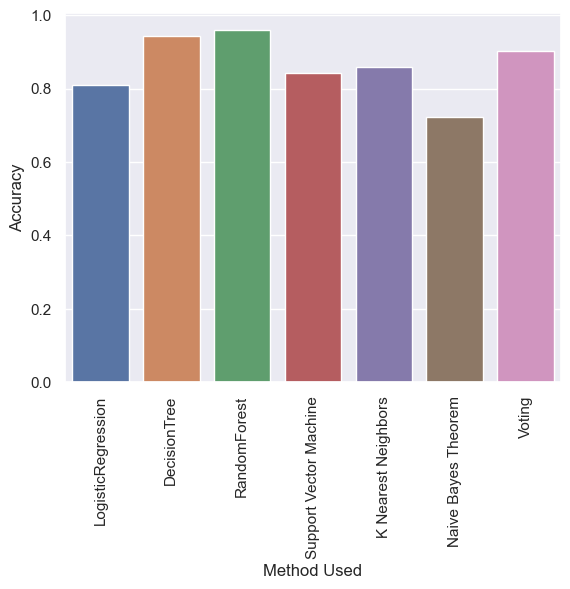

In [35]:
list_met = []
list_accuracy = []

# Logistic Regression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# SVC
svc = SVC()
svc = svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Combining all the above model with voting classifier
model_evc = VotingClassifier(estimators=[('logit', logit),('dt',dt),('rf', rf),('svc', svc),('knn', knn),('nb', nb)], voting='hard')
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogisticRegression','DecisionTree','RandomForest','Support Vector Machine','K Nearest Neighbors','Naive Bayes Theorem','Voting']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_evc]

list3 = [logit, dt, rf, svc, knn, nb, model_evc]

df_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})

print(df_accuracy)

chart = sns.barplot(x = 'Method Used', y='Accuracy', data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [36]:
pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)

accuracy_evc_training = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print(accuracy_evc_training)
print("***********************************************")
print(accuracy_evc_test)

0.9351893816769181
***********************************************
0.9011458535637988


In [37]:
#Conclusion: Random Forest Model gives the best Accuracy and precision 